# Unsupervised Learning: 
## Application of Graphical Network Analysis on Stock Returns Data

## 1. Set Up Environment and Read Data

### 1.0 Model Setup

In [1]:
# Import all the necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import csv
from datetime import datetime, timedelta

from sklearn import cluster, covariance, manifold
from matplotlib.collections import LineCollection 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the self-defined function from the python file
from graphical_analysis_lib import *

### 1.1 Dataset Overview:

In [5]:
print(firms_info.shape)
firms_info

(22, 2)


,Name,Sector
Ticker,,
FRC,First Republic,Bank
PNC,PNC Financial,Bank
USB,US Bancorp,Bank
JPM,JPMorgan Chase,Bank
BAC,Bank of America,Bank
C,Citigroup,Bank
RY,Royal Bank of Canada,Bank
WFC,Wells Fargo,Bank
GS,Goldman Sachs,Bank


In [6]:
# Get and print the Sector Information
Sectors = firms_info.Sector.unique()
print(Sectors)

['Bank' 'Health' 'Energy' 'Tech']


### 1.2 Load Data
Load the dataset from our Excel file. Plot and Examine the data.

In [7]:
# Load Stock Return dataset 
file_name = 'CleanedData_Weekly.xlsx'
sheet_name = 'Stock Returns'
df = pd.read_excel(file_name, sheet_name, index_col=0)
df.index=pd.to_datetime(df.index)    
data = df.copy()

In [8]:
data

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA,SP500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-09,NaN,-0.032304,-0.049869,-0.058139,-0.029888,-0.030302,-0.042493,-0.032457,-0.123426,-0.113398,...,0.115349,0.054307,NaN,0.042568,0.003161,-0.032218,NaN,-0.045503,NaN,-0.018908
2000-01-16,NaN,0.097264,0.019338,0.015465,0.034659,0.074074,-0.017752,0.065494,0.037093,0.088261,...,-0.010843,-0.013980,NaN,-0.036678,-0.070379,0.009422,NaN,0.007291,NaN,0.016428
2000-01-23,NaN,-0.061498,-0.094850,-0.012690,-0.093051,-0.026939,-0.035181,-0.121438,0.002128,-0.035047,...,-0.022765,0.014925,NaN,0.017960,0.016948,0.108278,NaN,-0.075724,NaN,-0.016237
2000-01-30,NaN,0.045583,0.005989,0.051414,0.001367,-0.005537,0.068037,0.058020,0.015318,-0.044340,...,0.054358,-0.072060,NaN,-0.067749,-0.041110,-0.087029,NaN,-0.053012,NaN,-0.056336
2000-02-06,NaN,-0.028609,0.014881,0.066015,-0.008197,-0.021727,-0.054815,0.000774,-0.026581,0.037512,...,-0.017185,0.025358,NaN,-0.048448,-0.086906,0.062731,NaN,0.084604,NaN,0.047208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.111717,0.090144,0.079866,0.087626,0.064430,0.086395,0.101580,0.095159,0.098984,0.101420,...,0.056960,0.019506,-0.008995,0.015730,0.006964,-0.002980,0.014351,-0.001417,0.038508,0.030066
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555,0.058633,0.049147
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886,-0.008699,-0.047783


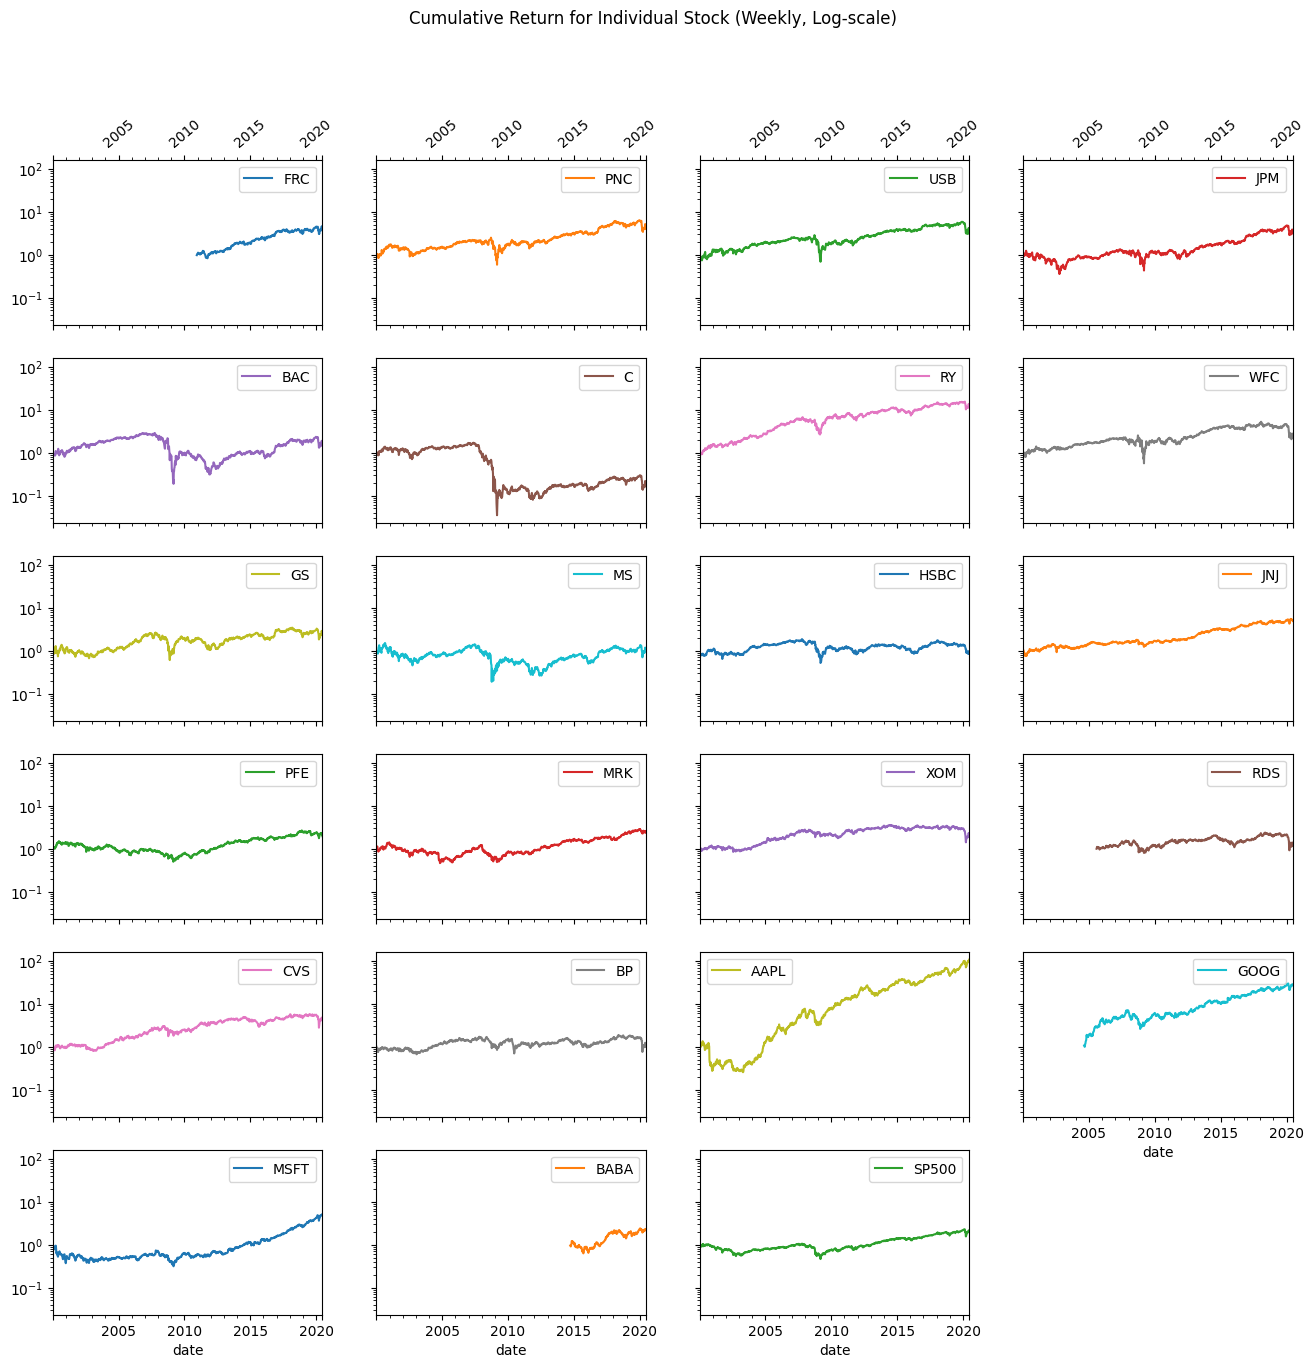

In [9]:
# Plot cumulative return for each firm
lo_col = 4
lo_row = int(np.ceil(len(df.columns)/4))
f_hei = lo_row * 2.5
f_wid = lo_col * 4
ax = (data+1).cumprod().plot(subplots=True, layout=(lo_row, lo_col), figsize=(f_wid, f_hei),
                             logy=True, sharex=True, sharey=True,
                             title='Cumulative Return for Individual Stock (Weekly, Log-scale)');
for i in range(lo_col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)
plt.show()

### 1.3 Summary Statistics
For each firm, calculate and output the: 
- Total Return
- Average return,
- Annualized Average return, 
- Annualized standard deviation, 
- Annualized Sharpe Ratio,
- Maximum drawdown.

Note: we used the 3-Month T-Bill Return as an indicator for risk-free rate when calculating for Sharpe Ratio. (Data Source: https://fred.stlouisfed.org/series/WTB3MS).

In [10]:
# Output the summary statistics of the data for the whole time period
# Note: Firms with missing data will be dropped in this summary statistics calculation
getSumStat(data)

Summary Statistic Information from 01/03/2000 to 06/28/2020:
Dropping firms: 
FRC
RDS
GOOG
BABA


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
PNC,Bank,311.54,0.25,14.05,35.74,0.34,-76.64
USB,Bank,260.58,0.23,12.75,34.18,0.32,-76.09
JPM,Bank,224.48,0.24,13.45,37.46,0.31,-71.51
BAC,Bank,56.75,0.24,13.07,46.04,0.25,-93.46
C,Bank,-81.53,0.10,5.61,53.84,0.07,-97.97
RY,Bank,1182.27,0.30,16.61,24.27,0.61,-60.28
WFC,Bank,125.06,0.21,11.28,37.52,0.25,-77.71
GS,Bank,153.40,0.22,11.88,37.01,0.27,-77.20
MS,Bank,12.70,0.24,13.19,49.77,0.23,-87.57
HSBC,Bank,-14.04,0.05,2.78,26.18,0.04,-72.16


Note that some firms have missing data for the whole time period given in the dataset. 

We can change the time period to the starting date of a given firm's data, so that one can examine the Summary Statistics for that particular firm.

In [11]:
###########################################   CAN BE CHANGED  #############################################
# This frim has already disappeared :<
firm_name = 'FRC'
###########################################   CAN BE CHANGED  #############################################

In [12]:
# Output the index (or date) of the first datapoint for given firm's returns
data[firm_name].first_valid_index()

Timestamp('2010-12-12 00:00:00')

In [13]:
###########################################   CAN BE CHANGED  #############################################
start_date = '2010-12-12'
end_date   = '2020-06-28'
###########################################   CAN BE CHANGED  #############################################

In [14]:
# Output the summary statistics of the data for the given time period
ind = (data.index >= start_date)*(data.index <= end_date)
display(getSumStat(data[ind], rf = df_rf['T-Bill'][ind]))

Summary Statistic Information from 12/06/2010 to 06/28/2020:
Dropping firms: 
BABA


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
FRC,Bank,299.96,0.34,19.47,25.94,0.72,-33.06
PNC,Bank,123.35,0.23,12.51,26.13,0.45,-46.63
USB,Bank,83.36,0.18,9.65,24.16,0.37,-48.13
JPM,Bank,200.97,0.29,16.23,26.72,0.58,-39.64
BAC,Bank,119.38,0.27,14.75,33.53,0.42,-66.00
C,Bank,22.89,0.16,8.42,34.47,0.23,-53.90
RY,Bank,82.56,0.16,8.62,19.95,0.40,-35.26
WFC,Bank,15.97,0.10,5.29,26.96,0.17,-60.90
GS,Bank,34.27,0.14,7.52,29.02,0.24,-48.89
MS,Bank,116.13,0.26,14.68,33.70,0.42,-58.41


## 2. Graphical Analysis

Below we will introduce a graphical analysis algorithm and apply it on the weekly stock returns data. The algorithm employs several unsupervised learning techniques and combine them together to visualize the stock returns data.

The algorithm takes the weekly returns of the stocks as input, and feeds it into three unsupervised learning techniques in order. The three techniques are:

- ***Sparse Inverse Covariance Estimation*** is used on the returns data, and it outputs a sparse matrix whose elements represent the conditional correlation between any two stock returns.
    - It provides information about which stocks are correlated conditionally on the others, and we can use this information to construct the graphical network.
        - The estimator we used in this graphical analysis example is called **Graphical Lasso**, which uses an l1 penalty to enforce sparsity on the precision matrix.
- ***Affinity Propagation***, like K-Means, is a clustering method that organizes the returns into clusters. It does not enforce equal-size clusters, and it can choose automatically the number of clusters from the data.
    - Stock returns that are clustered together can be considered as having a similar impact at the level of the full stock market.
- ***Manifold Learning*** is a non-linear embedding method that projects a high-dimensional graph onto 2D plane. The 2D graph is then constructed by combining the results from the above techniques in the following way:
    - Each node corresponds to a stock, with color being defined by the cluster label from Affinity Propagation.
    - Each edge links two stocks. 
        - The **strength** of the edge is defined by the sparse inverse covariance matrix (i.e. the precision matrix). The higher the value is, the more conditional correlated it is for the two stocks.
    - The Maniford 2D embedding is used to position the nodes on the plane.
        - The Manifold learning method we used in this graphical analysis example is called **Multidimensional scaling (MDS)**, which seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space

The source code is wrapped up in Graphical_Analysis_functions.py, and is beyond the scope of the course. Interested readers can find more information and read about the above three techniques.

References: 
- https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html
- https://scikit-learn.org/stable/modules/covariance.html#sparse-inverse-covariance
- https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation
- https://scikit-learn.org/stable/modules/manifold.html#multi-dimensional-scaling-mds


Recall that the sectors available in this dataset are:

In [15]:
print(Sectors)

['Bank' 'Health' 'Energy' 'Tech']


### Data Analysis - First Trial

Specifications:
- Enter some specific dates in the "**start_date**" and "**end_date**" to specify the start and end date.
- By default ( i.e. **Sectors_chosen** = [] ), ALL sectors will be included in the graphical analysis.
    - if certain sectors are entered in the "**Sectors_chosen**" option, then only those sectors will be examined in the graphical network analysis.
    - e.g: Sectors_chosen = ['Bank','Tech']
        - Only the Bank and Tech sectors will be examined.
- By default ( i.e. **drop_firm** = [] ), ALL firms in the given sectors (specified in "**Sectors_chosen**") will be included in the graphical analysis.
    - if certain firms are entered in the "**drop_firm**" option, then only those firms will NOT be examined in the graphical network analysis.
    - e.g: drop_firm = ['FRC','RY']
        - 'FRC' and 'RY' will not be examined.
- By default (i.e. **display_SumStat** = True, **display_IndRet** = True), the summary statisitcs and the individual firm performance (individual firm's cumulative returns) will be displayed

In [16]:
###########################################   CAN BE CHANGED  #############################################
# Start and End date we are considering:
start_date = '2020-01-01'
end_date   = '2020-06-28'

# Sectors which we will be testing:
Sectors_chosen = ['Bank','Health','Energy','Tech']

# The list of firms we want to drop:
drop_firm = []

# Whether we want to display the summary statisitcs and/or individual firm performance:
display_SumStat = True
display_IndRet = True
###########################################   CAN BE CHANGED  #############################################

Results over the time period  2020-01-01  to  2020-06-28 :

Sectors choosen in the Graphical Analysis are:
['Bank', 'Health', 'Energy', 'Tech']

Number of firms examined: 22
Cluster 1: FRC, PNC, USB, JPM, BAC, C, RY, WFC, GS, MS, HSBC
Cluster 2: JNJ, PFE, MRK
Cluster 3: XOM, RDS, CVS, BP
Cluster 4: AAPL, GOOG, MSFT
Cluster 5: BABA


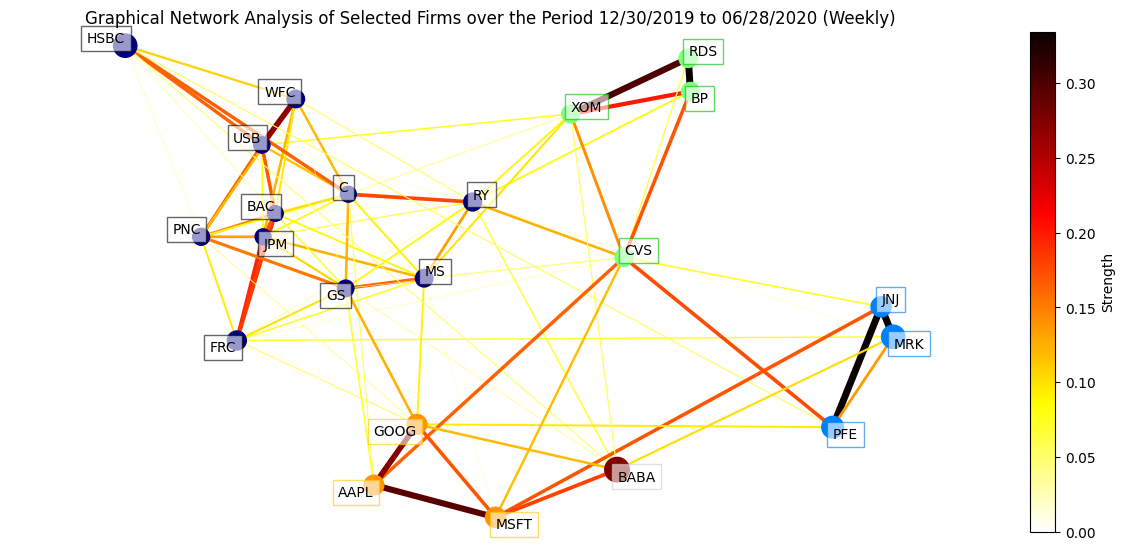

Individual Stock Performance over the Period 12/30/2019 to 06/28/2020 (Weekly):


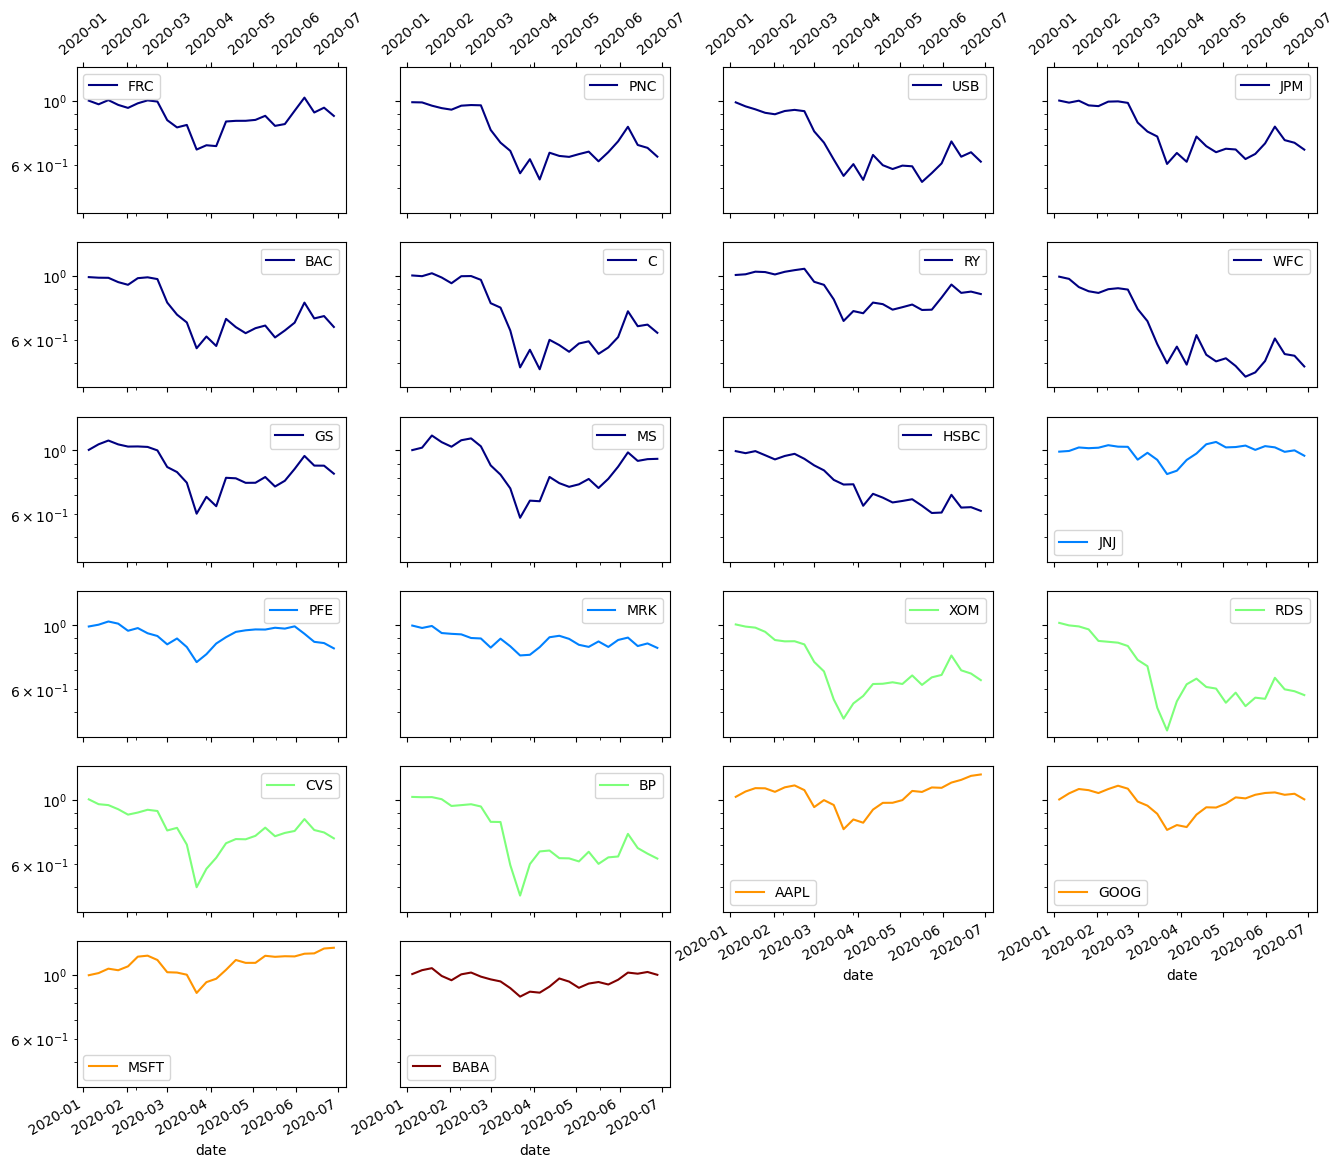

Summary Statistic Information from 12/30/2019 to 06/28/2020:


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
FRC,Bank,-11.45,-0.16,-8.11,57.39,-0.15,-32.56
PNC,Bank,-35.98,-1.27,-48.68,67.95,-0.74,-45.96
USB,Bank,-38.49,-1.44,-52.93,67.65,-0.80,-46.95
JPM,Bank,-32.30,-1.13,-44.75,62.17,-0.74,-39.64
BAC,Bank,-33.63,-1.14,-44.79,68.50,-0.67,-43.26
C,Bank,-36.64,-1.09,-43.39,83.90,-0.53,-53.47
RY,Bank,-13.72,-0.38,-17.95,44.40,-0.42,-34.02
WFC,Bank,-51.54,-2.22,-68.89,76.84,-0.92,-54.91
GS,Bank,-16.94,-0.32,-15.13,65.86,-0.24,-44.17
MS,Bank,-6.51,0.15,8.25,66.58,0.12,-48.07


In [17]:
print('Results over the time period ', start_date, ' to ', end_date, ':')
print()

# Output the Clustering information, graphical network plot, 
# as well as summary statistics (optional) and the individual firm performance (optional)
# Store the correlation matrix and precision matrix in "est" (stands for estimates)
# Store the plotting configuration information in "con_fig" which will be needed if we want to use the ZOOM functions
## Note: you can view the correlation matrix by looking at est[0] and view the precision matrix by looking at est[1] 
est, con_fig = graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat, display_IndRet)

We can use the following code to ZOOM IN and focus on a particular sector (or sectors) from the given network graph (above).

In [18]:
###########################################   CAN BE CHANGED  #############################################
# The list of Sector(s) we want to look at more closely
Sectors_list = ['Bank']
###########################################   CAN BE CHANGED  #############################################

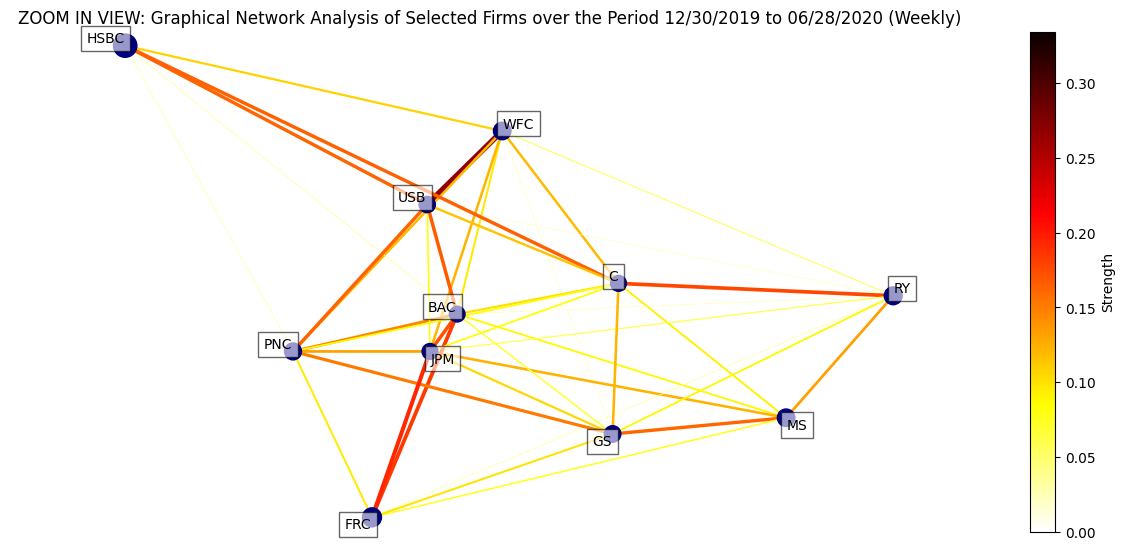

In [19]:
graphicalAnalysis_plot_ZOOM_bySector(Sectors_list, con_fig)

We can also use the following code to ZOOM IN and focus on a particular set of firms from the given network graph.

In [20]:
###########################################   CAN BE CHANGED  #############################################
# The list of firms we want to look at more closely
# Note: These firms don't have to be from the same sector 
# (but they need to be in the "Sectors_chosen" list if "Sectors_chosen" is different from default setting)
firms_list = ['FRC','JPM','BAC', 'GS', 'MS', 'PNC','C']
###########################################   CAN BE CHANGED  #############################################

ZOOM IN View of the Selected Firms:
['FRC', 'JPM', 'BAC', 'GS', 'MS', 'PNC', 'C']


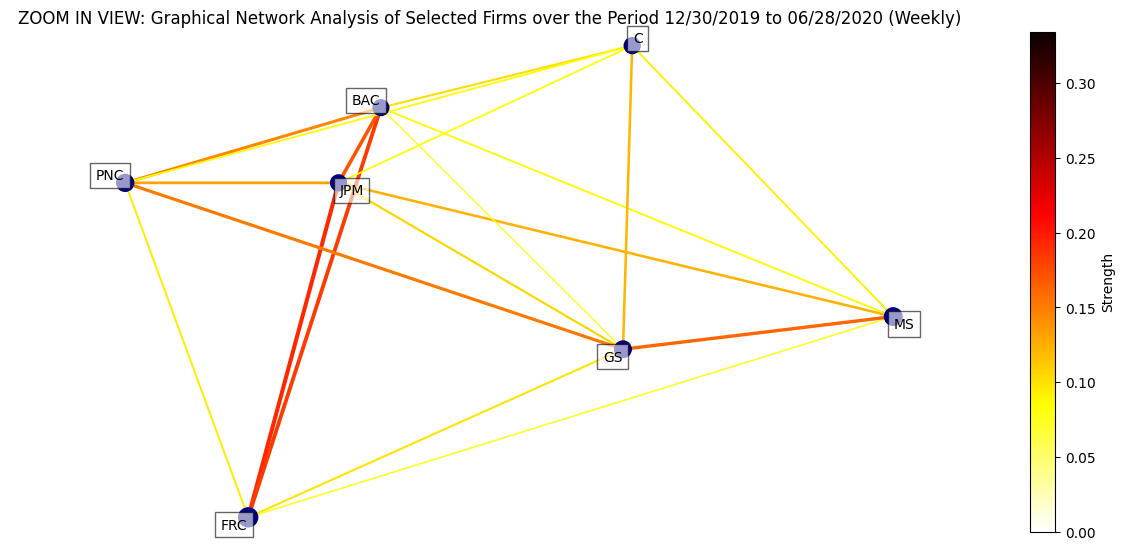

In [21]:
print('ZOOM IN View of the Selected Firms:')
print(firms_list)
graphicalAnalysis_plot_ZOOM_byFirm(firms_list, con_fig)

### Data Analysis - Alternative

Recall:

Specifications:
- Enter some specific dates in the "**start_date**" and "**end_date**" to specify the start and end date.
- By default ( i.e. **Sectors_chosen** = [] ), ALL sectors will be included in the graphical analysis.
    - if certain sectors are entered in the "**Sectors_chosen**" option, then only those sectors will be examined in the graphical network analysis.
    - e.g: Sectors_chosen = ['Bank','Tech']
        - Only the Bank and Tech sectors will be examined.
- By default ( i.e. **drop_firm** = [] ), ALL firms in the given sectors (specified in "**Sectors_chosen**") will be included in the graphical analysis.
    - if certain firms are entered in the "**drop_firm**" option, then only those firms will NOT be examined in the graphical network analysis.
    - e.g: drop_firm = ['FRC','RY']
        - 'FRC' and 'RY' will not be examined.
- By default (i.e. **display_SumStat** = True, **display_IndRet** = True), the summary statisitcs and the individual firm performance (individual firm's cumulative returns) will be displayed

In [22]:
###########################################   CAN BE CHANGED  #############################################
# Start and End date we are considering:
start_date = '2015-07-01'
end_date   = '2020-06-28'

# Sectors which we will be testing:
Sectors_chosen = ['Bank','Health','Energy','Tech']

# The list of firms we want to drop:
drop_firm = []

# Whether we want to display the summary statisitcs and/or individual firm performance:
display_SumStat = True
display_IndRet = True
###########################################   CAN BE CHANGED  #############################################

Results over the time period  2015-07-01  to  2020-06-28 :

Sectors choosen in the Graphical Analysis are:
['Bank', 'Health', 'Energy', 'Tech']

Number of firms examined: 22
Cluster 1: FRC, PNC, USB, JPM, BAC, C, RY, WFC, GS, MS, HSBC
Cluster 2: JNJ, PFE, MRK
Cluster 3: XOM, RDS, CVS, BP
Cluster 4: AAPL, GOOG, MSFT
Cluster 5: BABA


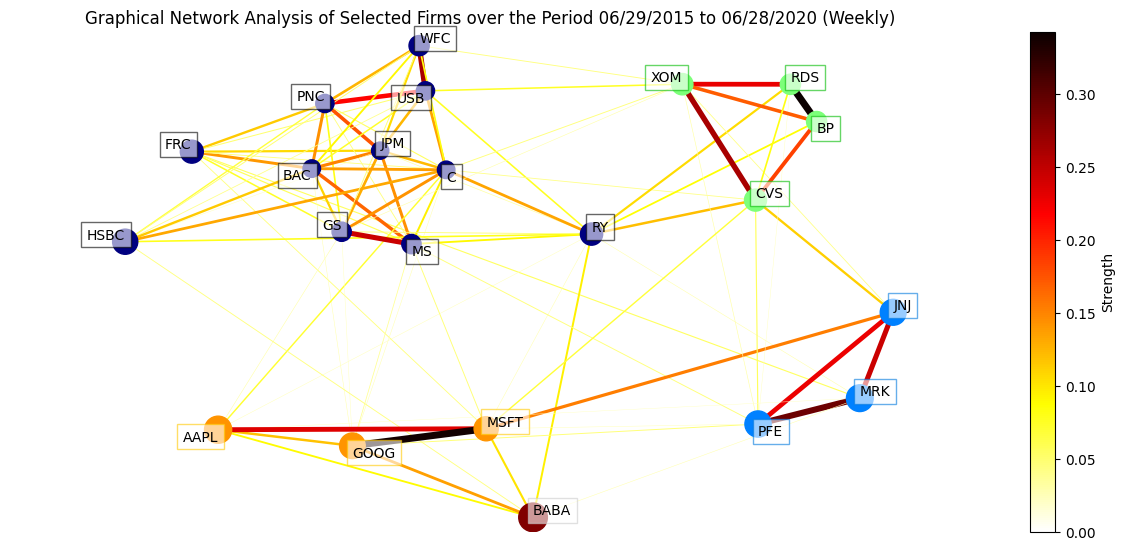

Individual Stock Performance over the Period 06/29/2015 to 06/28/2020 (Weekly):


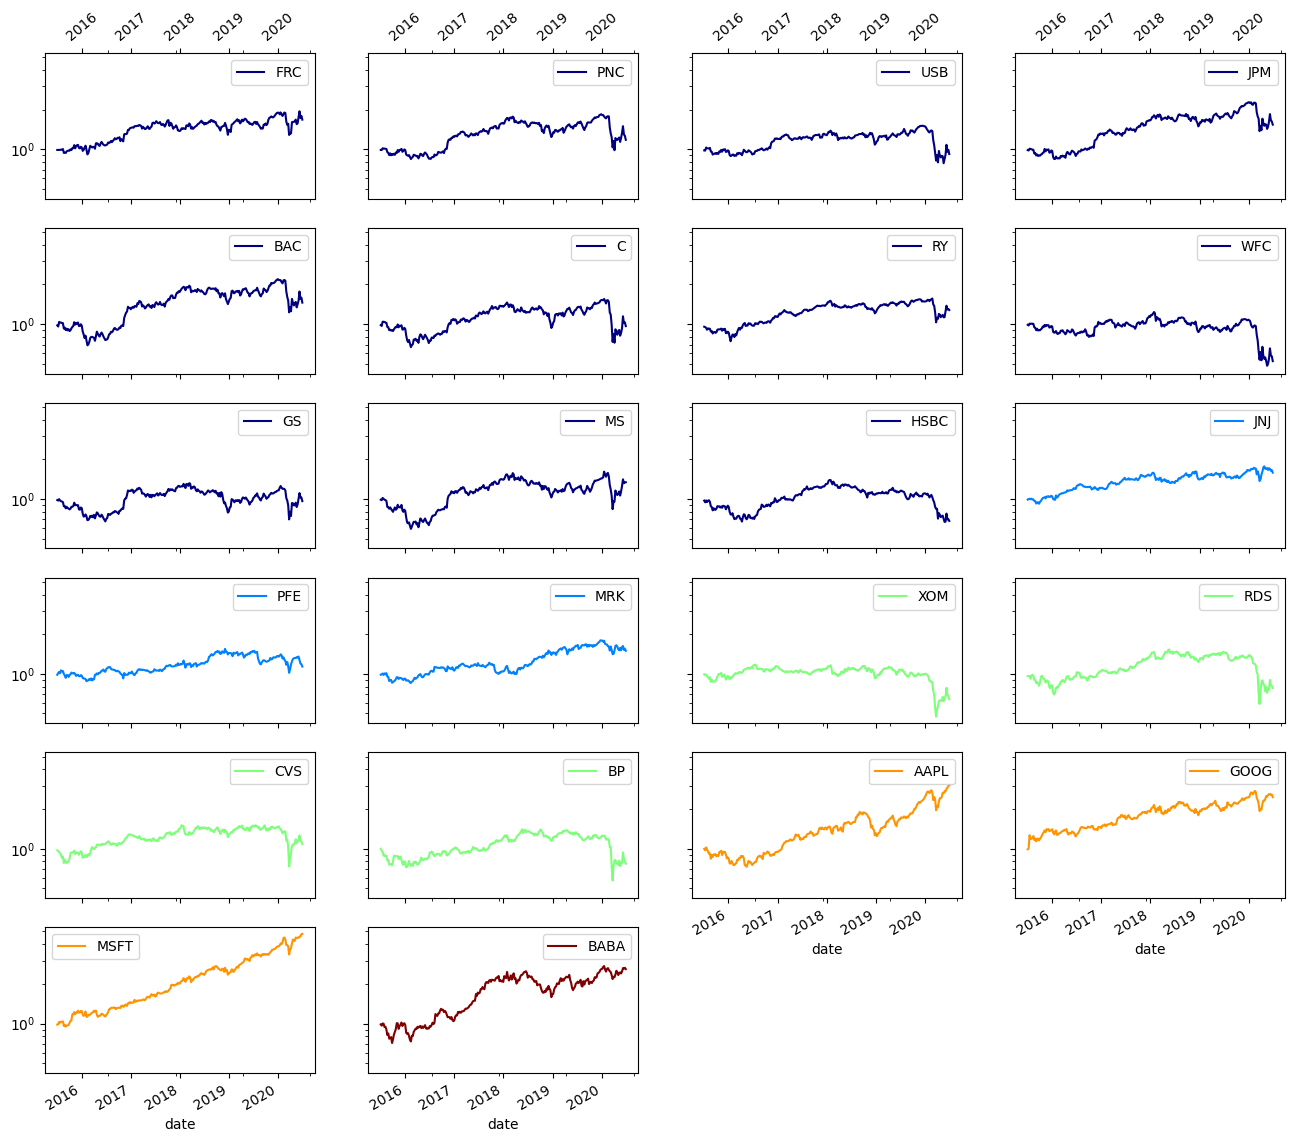

Summary Statistic Information from 06/29/2015 to 06/28/2020:


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
FRC,Bank,67.82,0.28,15.53,28.84,0.50,-32.56
PNC,Bank,17.99,0.15,7.95,29.49,0.23,-46.63
USB,Bank,-8.02,0.04,2.12,27.53,0.04,-48.13
JPM,Bank,53.80,0.24,13.29,27.99,0.43,-39.64
BAC,Bank,45.63,0.25,13.99,33.62,0.38,-43.98
C,Bank,-3.41,0.11,5.84,35.61,0.13,-53.47
RY,Bank,27.91,0.14,7.31,20.63,0.30,-34.02
WFC,Bank,-47.63,-0.15,-7.47,32.16,-0.26,-60.90
GS,Bank,-3.73,0.08,4.29,31.69,0.10,-46.94
MS,Bank,33.91,0.22,11.85,32.89,0.32,-48.07


In [23]:
print('Results over the time period ', start_date, ' to ', end_date, ':')
print()
est, con_fig = graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat, display_IndRet)

Algain, We can use the following code to ZOOM IN and focus on a particular sector (or sectors) from the given network graph (above).

In [24]:
###########################################   CAN BE CHANGED  #############################################
# The list of Sector(s) we want to look at more closely:
Sectors_list = ['Bank']
###########################################   CAN BE CHANGED  #############################################

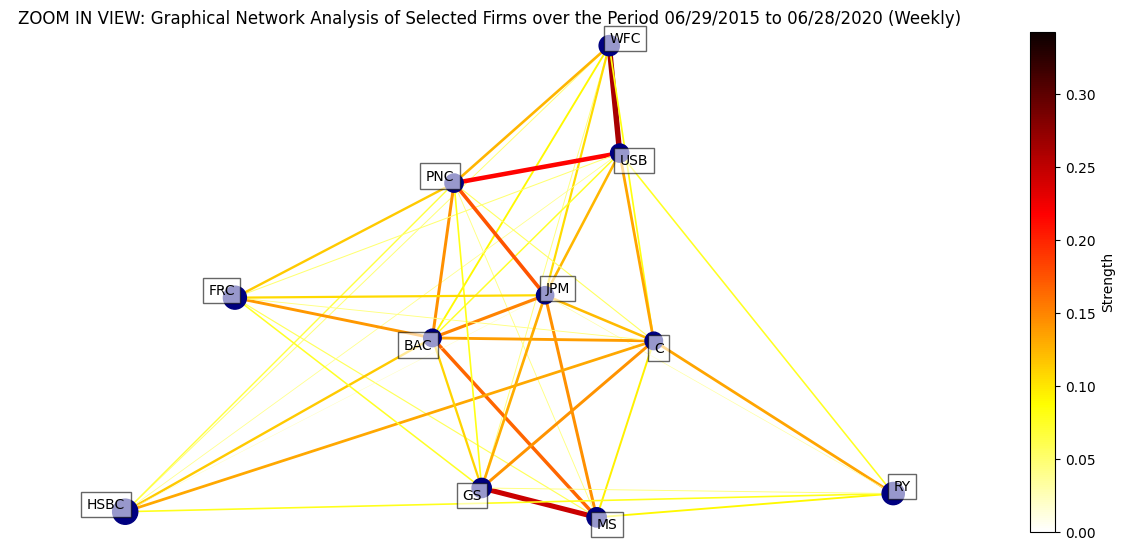

In [25]:
graphicalAnalysis_plot_ZOOM_bySector(Sectors_list, con_fig)

In [26]:
###########################################   CAN BE CHANGED  #############################################
# The list of firms we want to look at more closely
# Note: These firms don't have to be from the same sector
firms_list = ['FRC','PNC','USB','BAC', 'GS','JPM','C','MS']
###########################################   CAN BE CHANGED  #############################################

ZOOM IN View of the Selected Firms:
['FRC', 'PNC', 'USB', 'BAC', 'GS', 'JPM', 'C', 'MS']


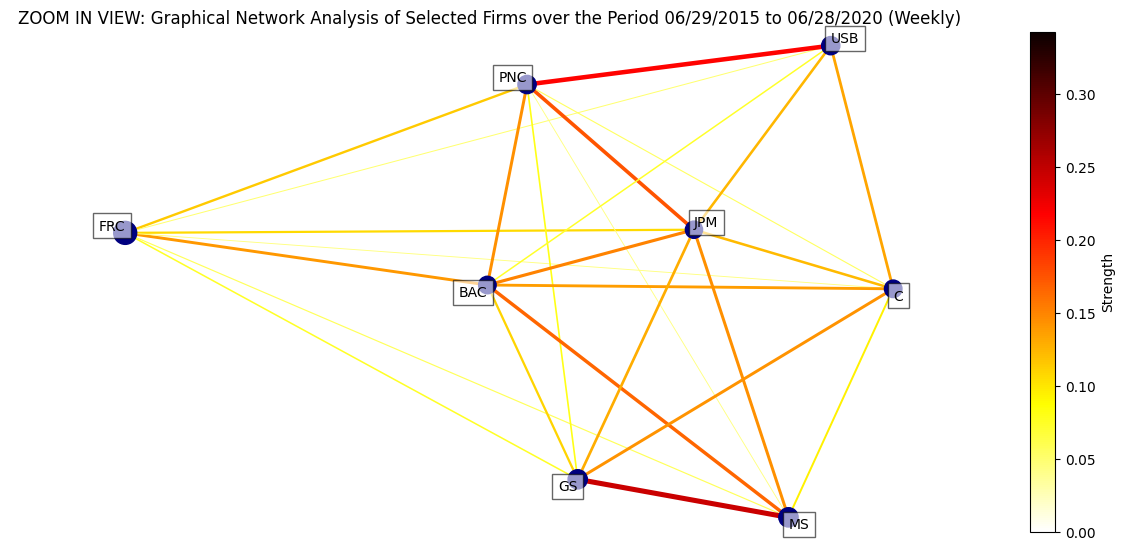

In [27]:
print('ZOOM IN View of the Selected Firms:')
print(firms_list)
graphicalAnalysis_plot_ZOOM_byFirm(firms_list, con_fig)

### Single Stock Analysis: Focusing on a particular firm

Note that some firms have missing data for the whole time period given in the dataset. 

We can change the time period to the starting date of a given firm's data, so that one can examine the graphical analysis results for that particular firm.

In [28]:
###########################################   CAN BE CHANGED  #############################################
# This firm has already disappeared
firm_name = 'FRC'
###########################################   CAN BE CHANGED  #############################################

In [29]:
# Output the index (or date) of the first datapoint for given firm's returns
data[firm_name].first_valid_index()

Timestamp('2010-12-12 00:00:00')

In [30]:
###########################################   CAN BE CHANGED  #############################################
# Start and End date we are considering:
start_date = '2010-12-12'
end_date   = '2020-06-28'

# Sectors which we will be testing:
Sectors_chosen = ['Bank','Health','Energy','Tech']

# The list of firms we want to drop:
drop_firm = []

# Whether we want to display the summary statisitcs and/or individual firm performance:
display_SumStat = True
display_IndRet = True
###########################################   CAN BE CHANGED  #############################################

Graphical analysis results over the time period  2010-12-12  to  2020-06-28  for  FRC :

Sectors choosen in the Graphical Analysis are:
['Bank', 'Health', 'Energy', 'Tech']

Dropping firms: 
BABA

Number of firms examined: 21
Cluster 1: FRC, PNC, USB, JPM, BAC, C, RY, WFC, GS, MS, HSBC
Cluster 2: JNJ, PFE, MRK
Cluster 3: XOM, RDS, CVS, BP
Cluster 4: AAPL
Cluster 5: GOOG, MSFT


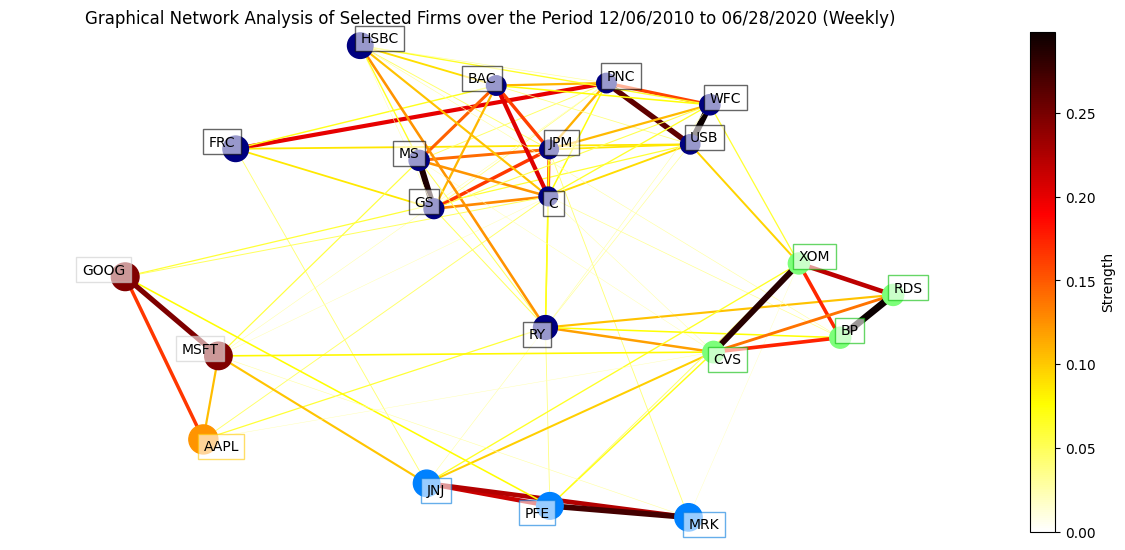

Individual Stock Performance over the Period 12/06/2010 to 06/28/2020 (Weekly):


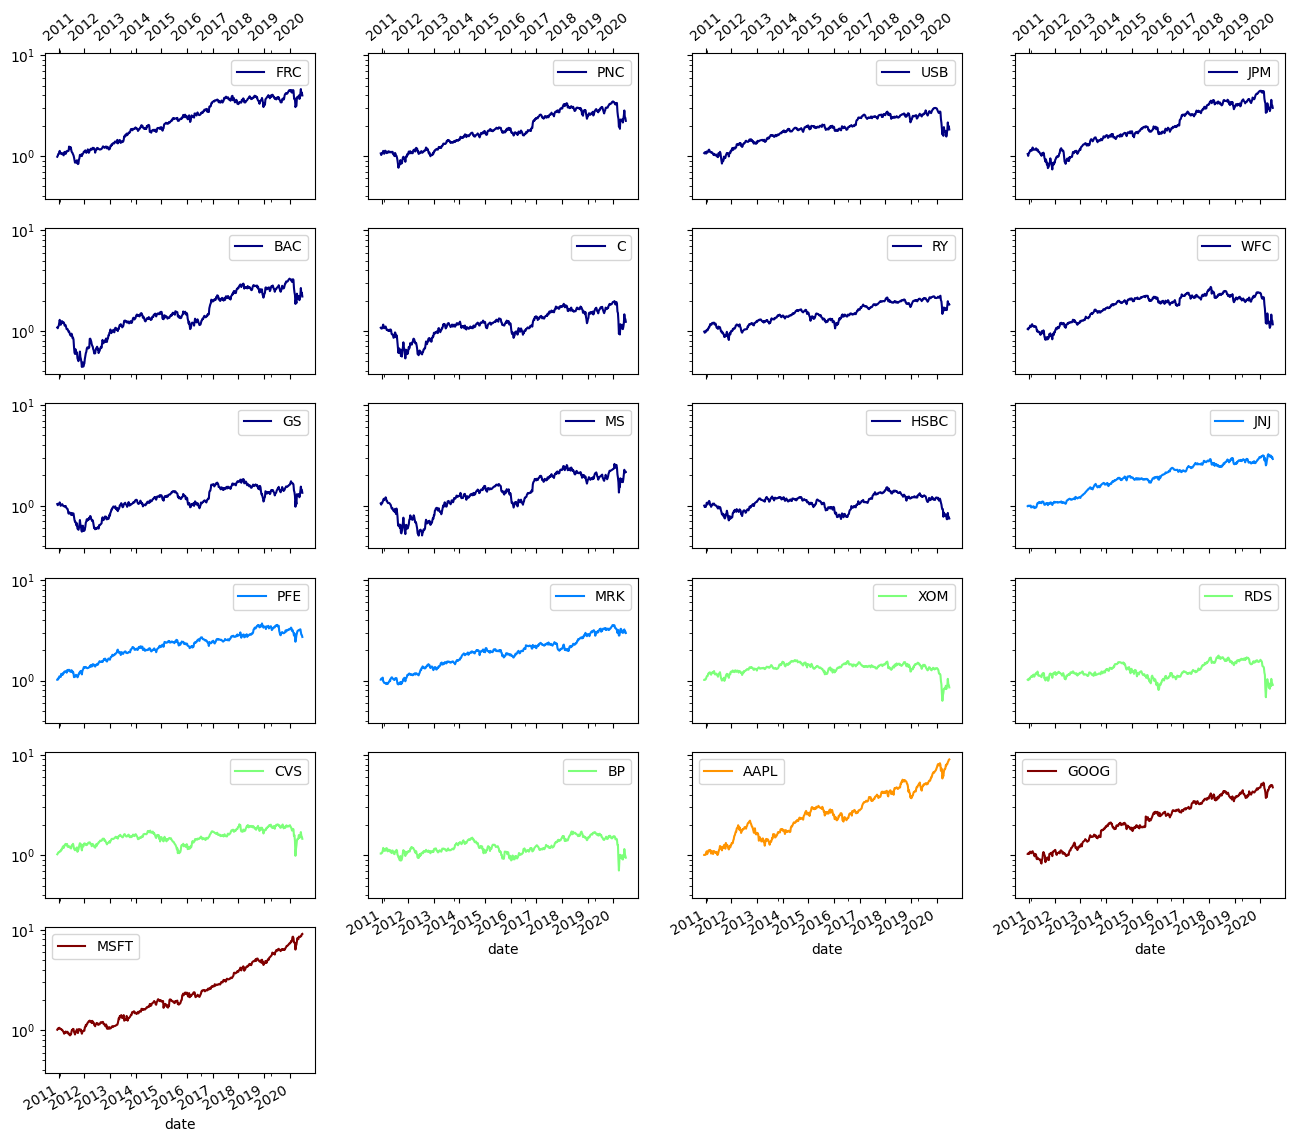

Summary Statistic Information from 12/06/2010 to 06/28/2020:


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
FRC,Bank,299.96,0.34,19.47,25.94,0.72,-33.06
PNC,Bank,123.35,0.23,12.51,26.13,0.45,-46.63
USB,Bank,83.36,0.18,9.65,24.16,0.37,-48.13
JPM,Bank,200.97,0.29,16.23,26.72,0.58,-39.64
BAC,Bank,119.38,0.27,14.75,33.53,0.42,-66.00
C,Bank,22.89,0.16,8.42,34.47,0.23,-53.90
RY,Bank,82.56,0.16,8.62,19.95,0.40,-35.26
WFC,Bank,15.97,0.10,5.29,26.96,0.17,-60.90
GS,Bank,34.27,0.14,7.52,29.02,0.24,-48.89
MS,Bank,116.13,0.26,14.68,33.70,0.42,-58.41


In [31]:
print('Graphical analysis results over the time period ', start_date, ' to ', end_date, ' for ', firm_name, ':')
print()
est, con_fig = graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat, display_IndRet)

ZOOM IN and focus on the Bank sector from the given network graph (above).

In [32]:
###########################################   CAN BE CHANGED  #############################################
# The list of Sector(s) we want to look at more closely
Sectors_list = ['Bank']
###########################################   CAN BE CHANGED  #############################################

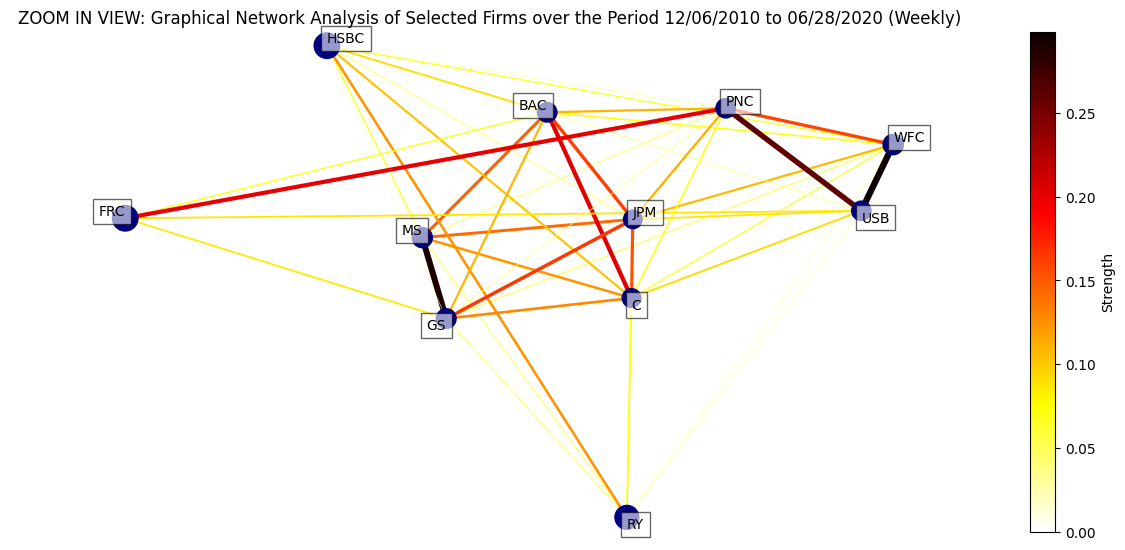

In [33]:
graphicalAnalysis_plot_ZOOM_bySector(Sectors_list, con_fig)

In [34]:
###########################################   CAN BE CHANGED  #############################################
# The list of firms we want to look at more closely
# Note: These firms don't have to be from the same sector
firms_list = ['FRC','PNC', 'USB', 'BAC', 'GS']
###########################################   CAN BE CHANGED  #############################################

ZOOM IN View of the Selected Firms:
['FRC', 'PNC', 'USB', 'BAC', 'GS']


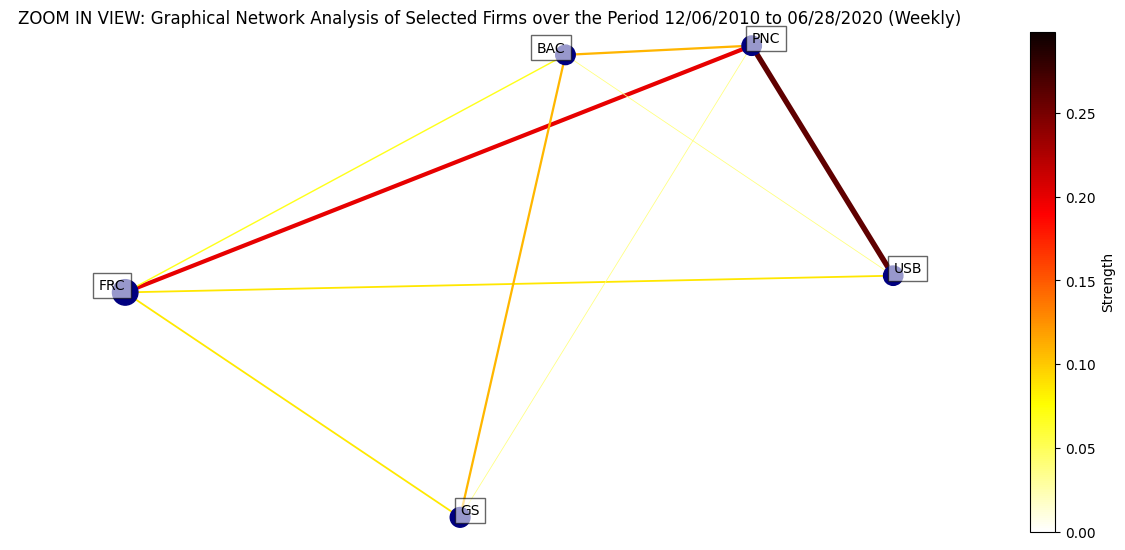

In [35]:
print('ZOOM IN View of the Selected Firms:')
print(firms_list)
graphicalAnalysis_plot_ZOOM_byFirm(firms_list, con_fig)